In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv("/content/gdrive/MyDrive/NYC taxi duration prediction/train.csv")

In [4]:
pd.set_option('display.max_columns',None)
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:
train.shape

(1458644, 11)

In [9]:
#id is redundant feature
train.id.nunique()

1458644

In [10]:
train['pickup_month']=pd.to_datetime(train["pickup_datetime"]).dt.month
train['pickup_weekday']=pd.to_datetime(train["pickup_datetime"]).dt.weekday
train['pickup_hours']=pd.to_datetime(train["pickup_datetime"]).dt.hour

In [11]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_weekday,pickup_hours
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,2,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,5,13


In [12]:
#cheack the validity of trip
sum(train.dropoff_datetime < train.pickup_datetime)

0

In [13]:
#cheack the percentile value
print(np.percentile(train.trip_duration, 99))
print(np.percentile(train.trip_duration, 99.99))
print(np.percentile(train.trip_duration, 99.999))
print(np.percentile(train.trip_duration, 99.9999))

3440.0
86327.0
86369.0
2145957.9521189043


In [14]:
#cheaking presence of extreme outlier
train.trip_duration.nlargest(10)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64

In [15]:
#deleting top extreme outlier
x=list(train.trip_duration.nlargest(4))
train=train[~train.trip_duration.isin(x)]

In [16]:
train.trip_duration.nlargest(10)

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
753765     86379
91717      86378
1221666    86378
66346      86377
1138915    86377
Name: trip_duration, dtype: int64

In [17]:
#reset index value
train.reset_index(drop=True,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458640 entries, 0 to 1458639
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458640 non-null  object 
 1   vendor_id           1458640 non-null  int64  
 2   pickup_datetime     1458640 non-null  object 
 3   dropoff_datetime    1458640 non-null  object 
 4   passenger_count     1458640 non-null  int64  
 5   pickup_longitude    1458640 non-null  float64
 6   pickup_latitude     1458640 non-null  float64
 7   dropoff_longitude   1458640 non-null  float64
 8   dropoff_latitude    1458640 non-null  float64
 9   store_and_fwd_flag  1458640 non-null  object 
 10  trip_duration       1458640 non-null  int64  
 11  pickup_month        1458640 non-null  int64  
 12  pickup_weekday      1458640 non-null  int64  
 13  pickup_hours        1458640 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 155.8+ MB


In [19]:
train.trip_duration.nsmallest(10)

35196     1
207497    1
269418    1
279493    1
285635    1
311745    1
346102    1
346959    1
404609    1
451395    1
Name: trip_duration, dtype: int64

In [20]:
# delete row which having less than 30 sec travaling time
sum(train.trip_duration<=30)

4890

In [21]:
train=train[train.trip_duration>30]

In [22]:
train.reset_index(drop=True,inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453750 entries, 0 to 1453749
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1453750 non-null  object 
 1   vendor_id           1453750 non-null  int64  
 2   pickup_datetime     1453750 non-null  object 
 3   dropoff_datetime    1453750 non-null  object 
 4   passenger_count     1453750 non-null  int64  
 5   pickup_longitude    1453750 non-null  float64
 6   pickup_latitude     1453750 non-null  float64
 7   dropoff_longitude   1453750 non-null  float64
 8   dropoff_latitude    1453750 non-null  float64
 9   store_and_fwd_flag  1453750 non-null  object 
 10  trip_duration       1453750 non-null  int64  
 11  pickup_month        1453750 non-null  int64  
 12  pickup_weekday      1453750 non-null  int64  
 13  pickup_hours        1453750 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 155.3+ MB


In [24]:
cat_col=[i for i in train.columns if train[i].nunique()<25]
for i in cat_col:
    print('for column'+"\t"+i+"\t"+'no. of unique value:'+str(train[i].nunique()))
    print(train[i].value_counts())

for column	vendor_id	no. of unique value:2
2    778494
1    675256
Name: vendor_id, dtype: int64
for column	passenger_count	no. of unique value:9
1    1029533
2     209839
5      77955
3      59781
6      48270
4      28346
0         24
9          1
8          1
Name: passenger_count, dtype: int64
for column	store_and_fwd_flag	no. of unique value:2
N    1445799
Y       7951
Name: store_and_fwd_flag, dtype: int64
for column	pickup_month	no. of unique value:6
3    255369
4    250787
5    247605
2    237533
6    233498
1    228958
Name: pickup_month, dtype: int64
for column	pickup_weekday	no. of unique value:7
4    222817
5    220173
3    217798
2    209508
1    202084
6    194599
0    186771
Name: pickup_weekday, dtype: int64
for column	pickup_hours	no. of unique value:24
18    90341
19    90090
21    83937
20    83843
22    80258
17    76211
14    74004
12    71637
15    71542
13    71267
23    69565
11    68253
9     67487
8     66881
10    65262
16    64031
7     55416
0     53041
1  

In [25]:
def haversine_distance(lat1, lon1, lat2, lon2):
        r = 6371
        phi1 = np.radians(lat1)
        phi2 = np.radians(lat2)
        delta_phi = np.radians(lat2-lat1)
        delta_lambda = np.radians(lon2-lon1)
        a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
        res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))
        return res

In [26]:
train["dist_bet_locat"]=haversine_distance(train.pickup_latitude,train.pickup_longitude,
                                           train.dropoff_latitude,train.dropoff_longitude)

In [27]:
print(max(train["dist_bet_locat"]))
print(min(train["dist_bet_locat"]))

1240.9086766508526
0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


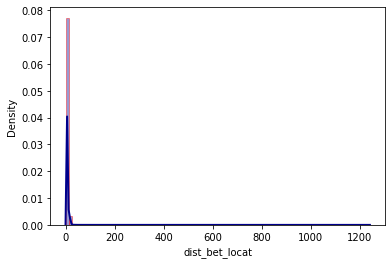

In [28]:
sns.distplot(train["dist_bet_locat"], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 2})

In [29]:
train.dist_bet_locat.describe()

count    1.453750e+06
mean     3.452257e+00
std      4.299164e+00
min      0.000000e+00
25%      1.239097e+00
50%      2.101185e+00
75%      3.885892e+00
max      1.240909e+03
Name: dist_bet_locat, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

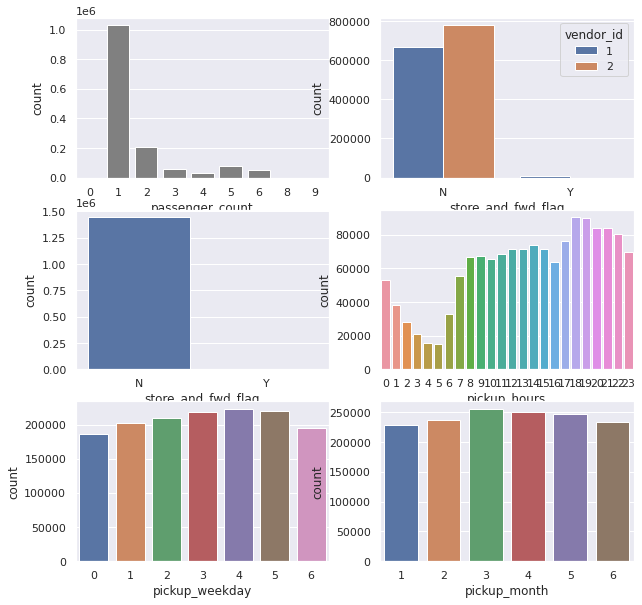

In [30]:
import seaborn as sns
sns.set()
fig,ax=plt.subplots(3,2,figsize=(10, 10))
sns.countplot(train['passenger_count'], color='gray',ax=ax[0,0])
sns.countplot(train['store_and_fwd_flag'],ax=ax[1,0])
sns.countplot(train['pickup_weekday'],ax=ax[2,0])
sns.countplot(train['store_and_fwd_flag'],hue=train["vendor_id"],ax=ax[0,1])
sns.countplot(train['pickup_hours'],ax=ax[1,1])
sns.countplot(train['pickup_month'],ax=ax[2,1])
plt.show()

<function matplotlib.pyplot.show>

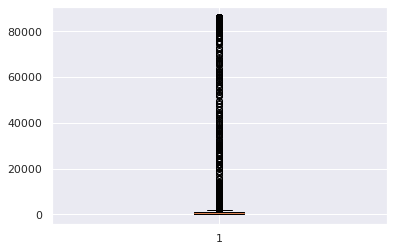

In [31]:
plt.boxplot(train["trip_duration"])
plt.show

<function matplotlib.pyplot.show>

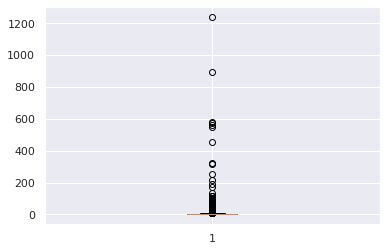

In [32]:
plt.boxplot(train["dist_bet_locat"])
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


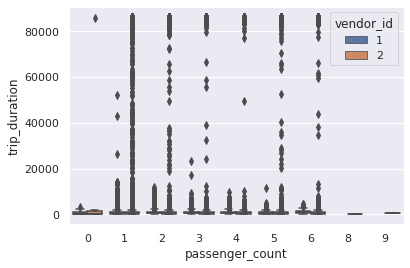

In [33]:
sns.boxplot(train.passenger_count,train["trip_duration"],hue=train.vendor_id)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


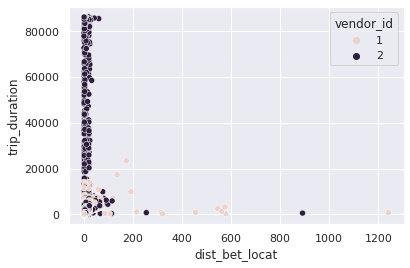

In [34]:
sns.scatterplot(train["dist_bet_locat"],train["trip_duration"],hue=train.vendor_id)

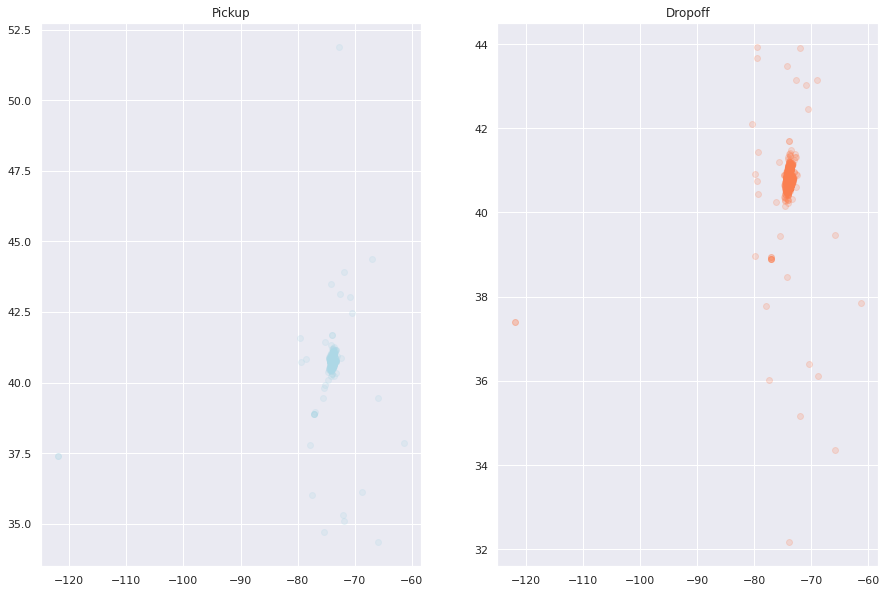

In [35]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].scatter(train["pickup_longitude"],
              train["pickup_latitude"],c='lightblue',alpha = 0.2)
ax[0].set_title('Pickup')
ax[1].scatter(train["dropoff_longitude"],
              train["dropoff_latitude"],c='coral',alpha = 0.2)
ax[1].set_title('Dropoff')
plt.show()

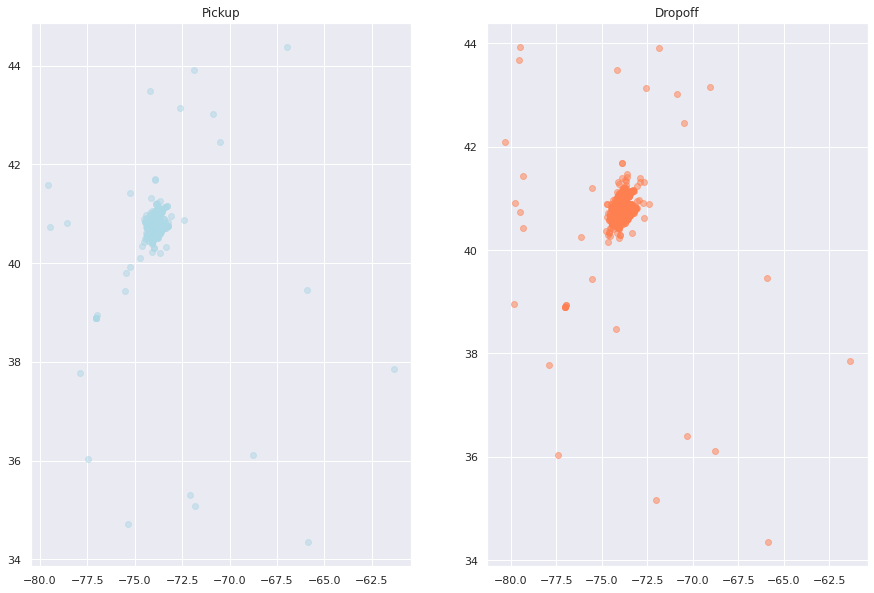

In [36]:
#check how look scatter plot after removing extreme point
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].scatter(train["pickup_longitude"][(train.pickup_longitude>=(-120)) & (train.pickup_latitude>=34)&(train.pickup_latitude<=45)],
              train["pickup_latitude"][(train.pickup_longitude>=(-120)) & (train.pickup_latitude>=34)&(train.pickup_latitude<=45)],
              c='lightblue',alpha = 0.5)
ax[0].set_title('Pickup')
ax[1].scatter(train["dropoff_longitude"][(train.dropoff_longitude>-120) & (train.dropoff_latitude>34)&(train.dropoff_latitude<=45)],
              train["dropoff_latitude"][(train.dropoff_longitude>-120 )& (train.dropoff_latitude>34)&(train.dropoff_latitude<=45)],
              c='coral',alpha = 0.5)
ax[1].set_title('Dropoff')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


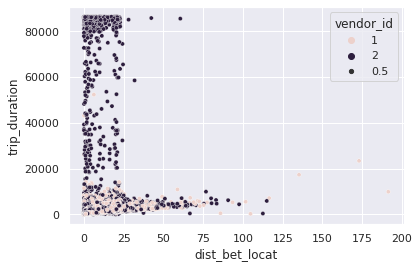

In [37]:
sns.scatterplot(train.dist_bet_locat[(train.dist_bet_locat<=200)&(train.dist_bet_locat!=0)],
                train.trip_duration[(train.dist_bet_locat<=200)&(train.dist_bet_locat!=0)],hue=train.vendor_id,size=0.5)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


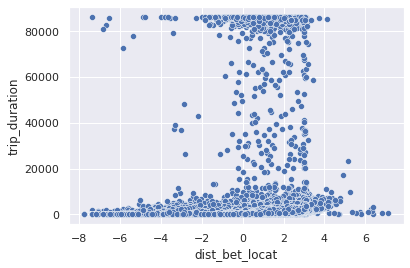

In [38]:
sns.scatterplot(np.log(train.dist_bet_locat),train.trip_duration)

In [39]:
def outlier_treatment(datacolumn):

    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5* IQR)
    return lower_range,upper_range

In [40]:
lower_range,upper_range=outlier_treatment(train['trip_duration'])
lower_range,upper_range
lower_range=round(float(lower_range))
upper_range=round(float(upper_range))

In [41]:
lower_range,upper_range

(-618, 2094)

In [44]:
lower_range_dist,upper_range_dist=outlier_treatment(train.dist_bet_locat)
lower_range_dist,upper_range_dist
lower_range_dist=round(float(lower_range_dist))
upper_range_dist=round(float(upper_range_dist))

In [46]:
lower_range_dist,upper_range_dist

(-3, 8)

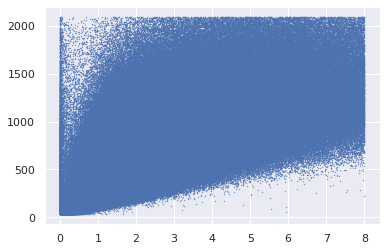

In [49]:
plt.scatter(train.dist_bet_locat[(train.dist_bet_locat>=lower_range_dist)&(train.dist_bet_locat<=upper_range_dist)&
                                     (train.trip_duration>=lower_range)&(train.trip_duration<=upper_range)],
                train.trip_duration[(train.dist_bet_locat>=lower_range_dist)&(train.dist_bet_locat<=upper_range_dist)&
                                     (train.trip_duration>=lower_range)&(train.trip_duration<=upper_range)],s=0.1)

In [55]:
train[(train.dist_bet_locat>=lower_range_dist)&(train.dist_bet_locat<=upper_range_dist)&
      (train.trip_duration>=lower_range)&(train.trip_duration<=upper_range)].shape        

(1298413, 15)